Informasi Dasar Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69120 entries, 0 to 69119
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               69120 non-null  object 
 1   Berat (kg)              69120 non-null  float64
 2   Fill_Percentage (%)     69120 non-null  float64
 3   Kualitas_Gas_CH4 (ppm)  69120 non-null  float64
 4   Kualitas_Gas_NH3 (ppm)  69120 non-null  float64
 5   Hari_dalam_Minggu       69120 non-null  object 
 6   Akhir_Pekan             69120 non-null  bool   
 7   Hari_Pengambilan        69120 non-null  bool   
 8   Lokasi_ID               69120 non-null  object 
 9   Latitude                69120 non-null  float64
 10  Longitude               69120 non-null  float64
dtypes: bool(2), float64(6), object(3)
memory usage: 4.9+ MB
None


Statistik Deskriptif:
         Berat (kg)  Fill_Percentage (%)  Kualitas_Gas_CH4 (ppm)  \
count  69120.000000

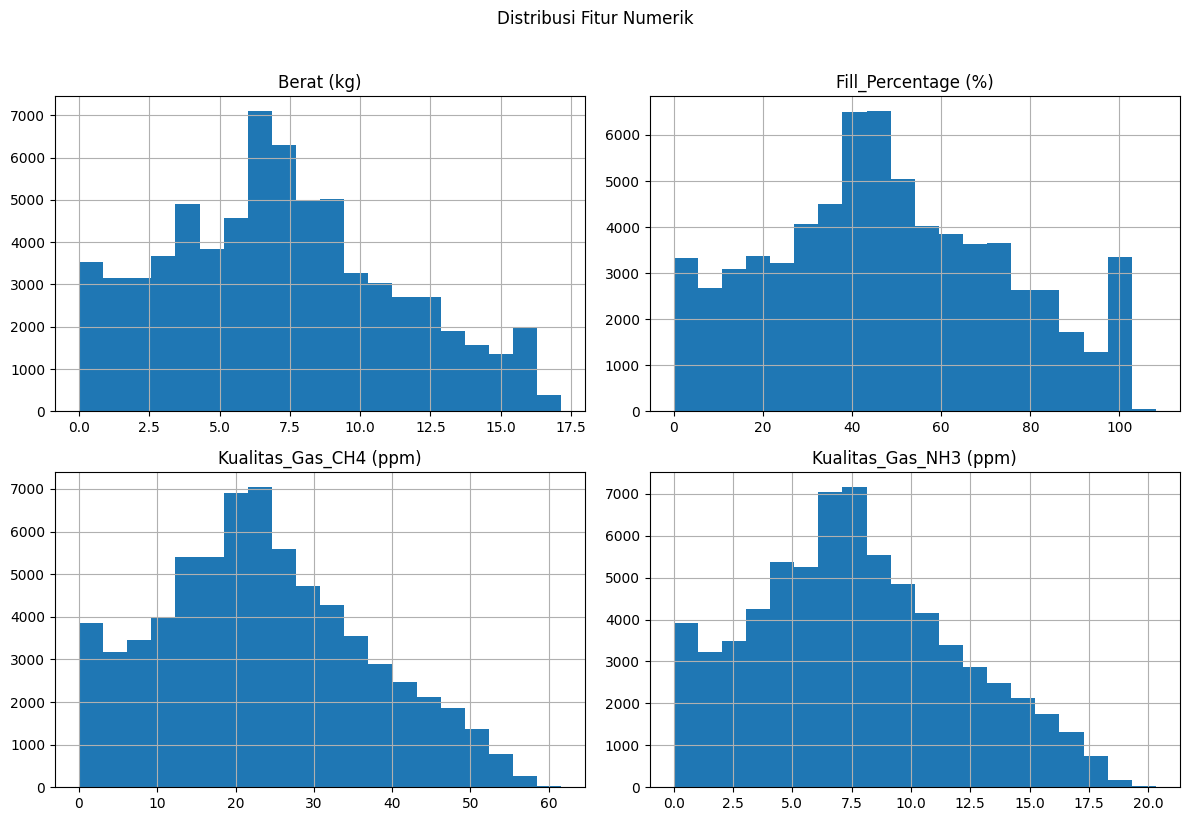

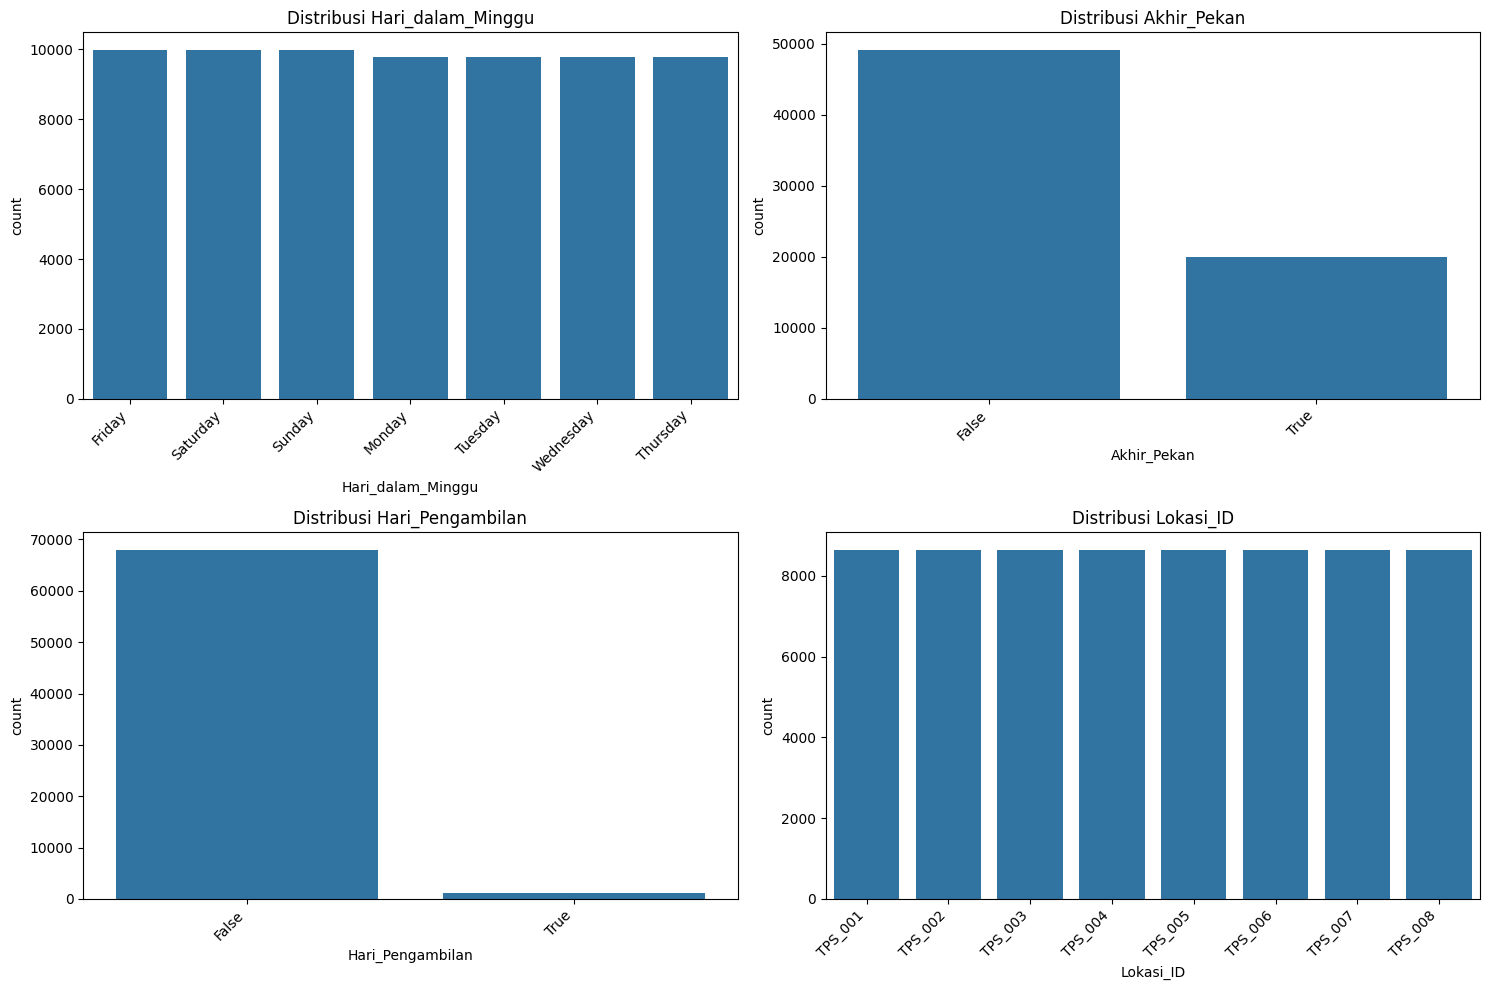

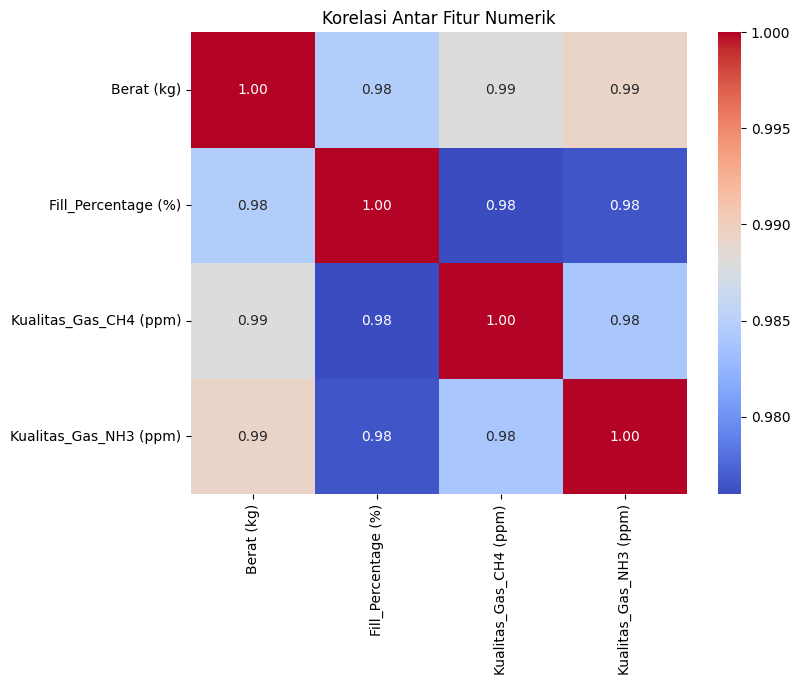

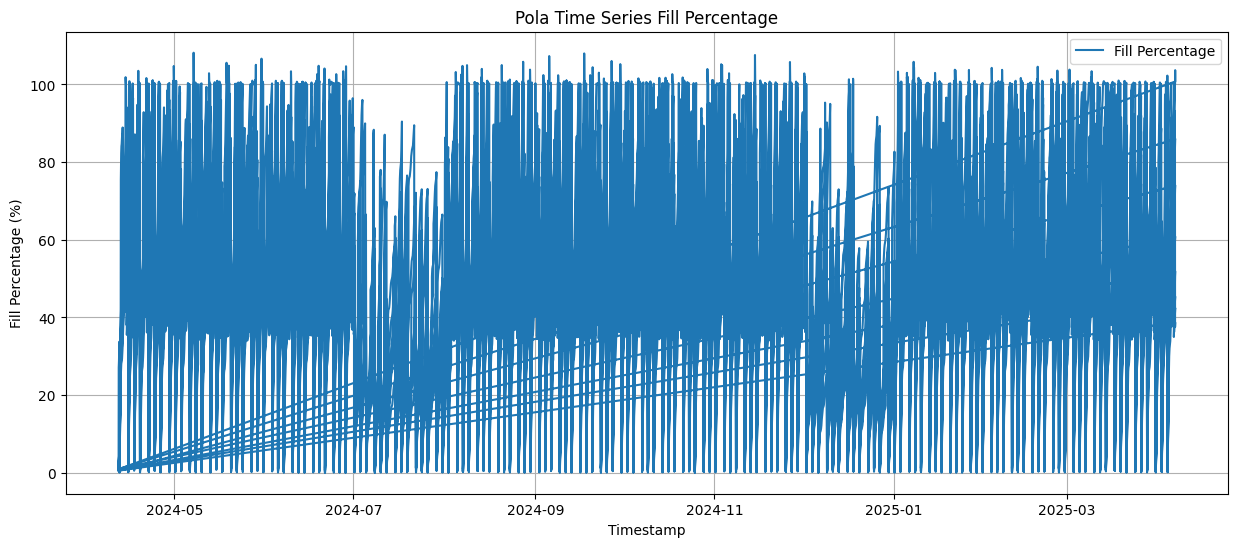

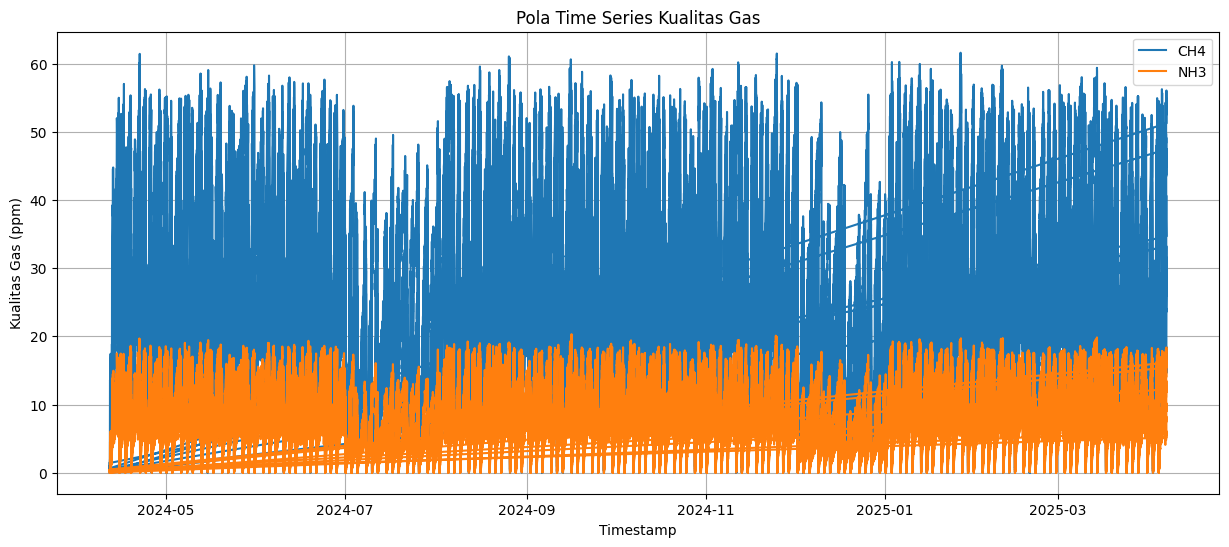

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'synthetic_food_waste_data.csv'

try:
   # Membaca dataset ke dalam Pandas DataFrame
   df = pd.read_csv(file_path)

   # 1. Informasi Dasar Dataset
   print("Informasi Dasar Dataset:")
   print(df.info())
   print("\n")

   # 2. Statistik Deskriptif
   print("Statistik Deskriptif:")
   print(df.describe())
   print("\n")

   # 3. Distribusi Data (Histogram) untuk Fitur Numerik
   numerical_features = ['Berat (kg)', 'Fill_Percentage (%)', 'Kualitas_Gas_CH4 (ppm)', 'Kualitas_Gas_NH3 (ppm)']
   df[numerical_features].hist(bins=20, figsize=(12, 8))
   plt.suptitle("Distribusi Fitur Numerik", y=1.02)
   plt.tight_layout()
   plt.show()

   # 4. Distribusi Data (Count Plot) untuk Fitur Kategorikal
   categorical_features = ['Hari_dalam_Minggu', 'Akhir_Pekan', 'Hari_Pengambilan', 'Lokasi_ID']
   plt.figure(figsize=(15, 10))
   for i, col in enumerate(categorical_features):
       plt.subplot(2, 2, i + 1)
       sns.countplot(data=df, x=col)
       plt.title(f'Distribusi {col}')
       plt.xticks(rotation=45, ha='right')
   plt.tight_layout()
   plt.show()

   # 5. Korelasi Antar Fitur Numerik (Heatmap)
   correlation_matrix = df[numerical_features].corr()
   plt.figure(figsize=(8, 6))
   sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
   plt.title("Korelasi Antar Fitur Numerik")
   plt.show()

   # 6. Pola Time Series (Plot Fill_Percentage dan Kualitas Gas terhadap Timestamp)
   if 'Timestamp' in df.columns:
       try:
           df['Timestamp'] = pd.to_datetime(df['Timestamp'])
           plt.figure(figsize=(15, 6))
           plt.plot(df['Timestamp'], df['Fill_Percentage (%)'], label='Fill Percentage')
           plt.xlabel('Timestamp')
           plt.ylabel('Fill Percentage (%)')
           plt.title('Pola Time Series Fill Percentage')
           plt.legend()
           plt.grid(True)
           plt.show()

           plt.figure(figsize=(15, 6))
           plt.plot(df['Timestamp'], df['Kualitas_Gas_CH4 (ppm)'], label='CH4')
           plt.plot(df['Timestamp'], df['Kualitas_Gas_NH3 (ppm)'], label='NH3')
           plt.xlabel('Timestamp')
           plt.ylabel('Kualitas Gas (ppm)')
           plt.title('Pola Time Series Kualitas Gas')
           plt.legend()
           plt.grid(True)
           plt.show()
       except Exception as e:
           print(f"Error plotting time series: {e}")
   else:
       print("Kolom 'Timestamp' tidak ditemukan, tidak dapat menampilkan pola time series.")

except FileNotFoundError:
   print(f"Error: File '{file_path}' tidak ditemukan. Pastikan nama file sudah benar.")
except Exception as e:
   print(f"Terjadi kesalahan: {e}")